## Gradient Descent - Boston Dataset
Boston dataset is one of the datasets available in sklearn.
You are given a Training dataset csv file with X train and Y train data. As studied in lecture, your task is to come up with Gradient Descent algorithm and thus predictions for the test dataset given.
Your task is to:
    1. Code Gradient Descent for N features and come with predictions.
    2. Try and test with various combinations of learning rates and number of iterations.
    3. Try using Feature Scaling, and see if it helps you in getting better results. 
Read Instructions carefully -
    1. Use Gradient Descent as a training algorithm and submit results predicted.
    2. Files are in csv format, you can use genfromtxt function in numpy to load data from csv file. Similarly you can use savetxt function to save data into a file.
    3. Submit a csv file with only predictions for X test data. File name should not have spaces. File should not have any headers and should only have one column i.e. predictions. Also predictions shouldn't be in exponential form. 
    4. Your score is based on coefficient of determination.


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Loading Datasets

train_dataset = np.genfromtxt("training_boston_x_y_train.csv", names = True, delimiter = ",")
train_df = pd.DataFrame(train_dataset)
print(train_df.describe())
num_cols = len(train_df.columns)
X_train = train_df.values[:, 0: num_cols -1 ]
Y_train = train_df.values[:, num_cols - 1]
print(X_train.shape)
print(Y_train.shape)

# print(X_train)
# print(Y_train)

test_dataset = np.genfromtxt("test_boston_x_test.csv", names = None, delimiter = ",")
test_df = pd.DataFrame(test_dataset)
print(test_df.describe())
num_cols = len(test_df.columns)
X_test = test_df.values

print(X_test.shape)

# print(X_train)

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     0.019628    0.002455    0.036170    0.028955    0.028775    0.032202   
std      1.067490    1.000813    1.017497    1.048995    0.999656    1.001174   
min     -0.417713   -0.487722   -1.516987   -0.272599   -1.465882   -3.880249   
25%     -0.408171   -0.487722   -0.867691   -0.272599   -0.878475   -0.571480   
50%     -0.383729   -0.487722   -0.180458   -0.272599   -0.144217   -0.103479   
75%      0.055208    0.156071    1.015999   -0.272599    0.628913    0.529069   
max      9.941735    3.804234    2.422565    3.668398    2.732346    3.555044   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     0.038395   -0.001288    0.043307    0.043786    0.019218   -0.015785   
std      0.985209    1.0278

In [3]:
# plotting features
import copy
import matplotlib.pyplot as plt
for i in range(X_train.shape[1]) :
    x = copy.deepcopy(X_train[:, i])
    x.sort()
    plt.title(i)
    plt.plot(x)
    plt.plot(x**2)
    plt.show()
    plt.hist(x)
    plt.show()
    plt.hist(x**2)
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [4]:
def single_step(X, Y, m, alpha):
    n_1 = len(m)
    num_eg = len(X)
    slope_m = np.zeros(n_1) 
    
    for j in range(n_1):
        for i in range(num_eg) :
            slope_m[j] += (-2/num_eg)* ((Y[i] - (m *(X[i])).sum() ) * X[i][j] )    
    #for j in range(n_1):
            m[j] -= alpha*slope_m[j]
    return m

def cost(X, Y, m):
    cost = 0
    num_eg = len(X)
    for i in range(num_eg) :
        cost += ((Y[i] - (m * X[i]).sum())**2 )/num_eg
    return cost

def gd(X, Y, alpha, num_iters):
    num_eg = len(X)
    X = np.c_[X, np.ones(X.shape[0])]
    m = np.zeros(len(X[0]))
    costs = {}
    #print(len(m))
    for i in range(num_iters):
        m = single_step(X, Y, m, alpha)
        if i % 50 == 0 :
            costs[i] = cost(X, Y, m)
            print(i, " ", costs[i])
    import matplotlib.pyplot as plt
    keys = [key for key in costs]
    values = [costs[key] for key in costs]
    plt.plot(keys, values)
    plt.show()
    return m

def predict(X, m) :
    X = np.c_[X, np.ones(X.shape[0])]
    Y = np.array([])
    for i in range(len(X)):
        Y_i = (X[i] * m).sum()
        Y = np.append(Y, Y_i)
    return Y

def scale_features(X_train) :
    import copy
    X = copy.deepcopy(X_train)
    means = np.array([X[:, i].mean() for i in range(X.shape[1])])
    stds = np.array([X[:, i].std() for i in range(X.shape[1])])
    
    for i in range(X.shape[0]) :
        X[i, :] = (X[i, :] - means)/stds
    return X
def score(Y_true, Y_pred) :
    mean = Y_true.mean()
    u = ((Y_true - Y_pred)**2).sum()
    v = ((Y_true - mean)**2).sum() 
    return 1 - (u/v)
# Introduce more features
def add_more_features (X_train, imp_cols_indices):
    X_train_df = pd.DataFrame(X_train)
    num_f = len(X_train_df.columns)
    col_names = X_train_df.columns
    new_df = X_train_df.copy()
    num_imp_cols = len(imp_col_indices)
    for i1 in range(num_imp_cols) :
        for j1 in range(i1, num_imp_cols):
            i = imp_cols_indices[i1]
            j = imp_cols_indices[j1]
            new_df[ str(col_names[i]) + "_" + str(col_names[j])] = X_train_df[i] * X_train_df[j]
    #print(new_df.describe())
    return new_df.values

In [19]:
from numpy.random import choice 
def gen_linear_regressors(X_train, Y_train, subset_size_ratio, num_regressors, alpha, num_iters) :
    n_plus_1 = len(X_train[0]) + 1
    num_examples = len(X_train)
    sub_set_size = int(subset_size_ratio * num_examples) 
    arr_m = np.empty((0, n_plus_1), dtype = float)
    print(arr_m.shape)
    for i in range(num_regressors) :
        subset_indices = choice(num_examples, sub_set_size, replace = False)
        X_i = X_train[subset_indices]
        Y_i = Y_train[subset_indices]
        m_i = gd(X_i, Y_i, alpha, num_iters)
        arr_m = np.vstack((arr_m, m_i))
        #arr_m = np.append(arr_m, m_i, axis = 0)
        print(arr_m.shape)
    return arr_m
def predict_from_models(X, arr_m):
    Y_pred_means = np.zeros(len(X))
    for i in range(len(arr_m)) :
        Y_pred = predict(X, arr_m[i])
        #print(i, " ", Y_pred)
        Y_pred_means += Y_pred
    Y_pred_means /= len(arr_m)
    return Y_pred_means

In [6]:
#scaled_X_train = scale_features(X_train)
#scaled_X_df = pd.DataFrame(scaled_X_train)
#scaled_X_df.describe()

(0, 29)
0   174.27489847968832
50   25.720261774191865
100   24.493253721976796
150   24.22110825585428
200   24.028826984078403
250   23.895458516116015
300   23.80240887795956
350   23.735758820232178
400   23.68682147217435
450   23.650080027939524
500   23.62190347036598
550   23.59984511513553
600   23.58223126875993
650   23.567903183644493
700   23.556049200153325
750   23.54609362064547
800   23.537622433727176
850   23.53033334164052
900   23.52400194930042
950   23.518458759945485


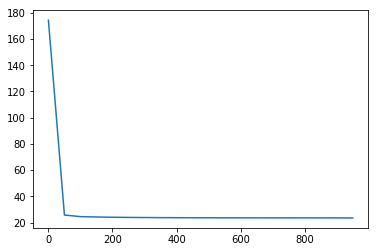

(1, 29)
0   158.43885623882
50   20.666720363600025
100   19.465109274339614
150   19.3317862278886
200   19.317950148824277
250   19.33080155225854
300   19.350531138261868
350   19.37155738060909
400   19.39221354114082
450   19.412027123609683
500   19.43090485049916
550   19.44887027417657
600   19.465976133310857
650   19.482275841928086
700   19.497815724185905
750   19.512634371270885
800   19.526764111967058
850   19.540232786304287
900   19.55306523884152
950   19.56528441283094


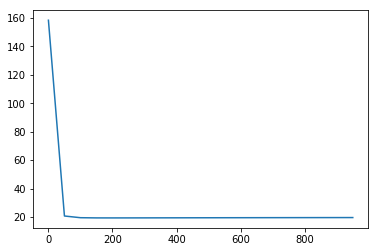

(2, 29)
0   156.76459127036037
50   24.022526680882958
100   22.256538088536963
150   21.96158004735561
200   21.825992502737463
250   21.725025940163412
300   21.641575402082793
350   21.571317633683126
400   21.512045419633846
450   21.46208568591426
500   21.42002601970064
550   21.384656316859274
600   21.354943743649702
650   21.330011585024312
700   21.30911872574902
750   21.29164030078281
800   21.2770501427968
850   21.26490532071747
900   21.254832800263948
950   21.2465181005038


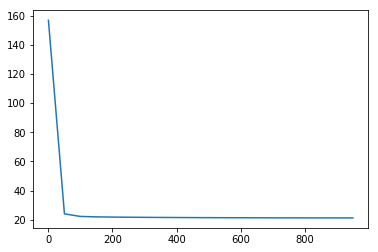

(3, 29)
0   151.37639735224172
50   21.672119060528647
100   20.136299120787072
150   19.819827477443763
200   19.679806650297483
250   19.594505252322396
300   19.53511949367704
350   19.490246276326392
400   19.45450569897833
450   19.42509322159143
500   19.40040139370854
550   19.379420473770622
600   19.36146265908688
650   19.34602753136878
700   19.332732108560744
750   19.321272025763015
800   19.311398575128987
850   19.302904302071152
900   19.295613483574176
950   19.28937554110411


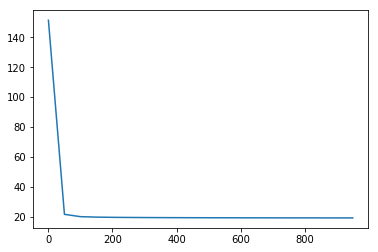

(4, 29)
0   155.62418299286148
50   18.388407559581154
100   17.37810775630408
150   17.2817960844247
200   17.220022879146633
250   17.17266537960415
300   17.136280969864195
350   17.107344226845232
400   17.083534756703866
450   17.063464745282737
500   17.046278675044302
550   17.031410120305708
600   17.018455851676226
650   17.00711163189106
700   16.99713801718976
750   16.98834090630085
800   16.980559689882355
850   16.97365955437341
900   16.967526192264238
950   16.96206198324145


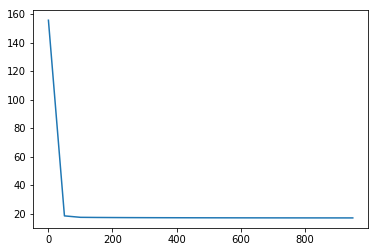

(5, 29)
0   168.99135744669275
50   22.89005260105966
100   21.769615722495647
150   21.6207868347446
200   21.55912206657573
250   21.518362219985658
300   21.48628246580438
350   21.459097681493844
400   21.435444675355598
450   21.414717308508123
500   21.396549804422058
550   21.3806574848569
600   21.366789563490475
650   21.354716793576646
700   21.34422922776065
750   21.335136200452183
800   21.327266228202454
850   21.320466359021122
900   21.314601048648235
950   21.309550752813696


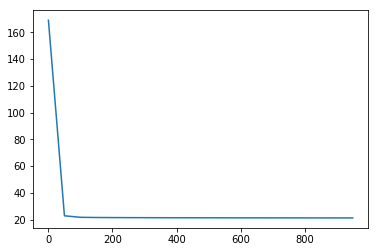

(6, 29)
0   169.25821583620052
50   19.807209770056645
100   18.775432533142194
150   18.620213503448717
200   18.55729367546694
250   18.52566590681908
300   18.506886174423652
350   18.492954840357555
400   18.48083471684481
450   18.469516786033743
500   18.458719690087683
550   18.448392099018672
600   18.43854024077049
650   18.42917431274503
700   18.42029524063662
750   18.41189396675682
800   18.40395393624468
850   18.396453853675933
900   18.38936992144994
950   18.382677454616523


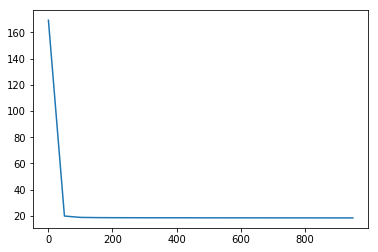

(7, 29)
0   177.58089056408144
50   26.714314006758624
100   24.942236145420704
150   24.694469603553344
200   24.60148629191043
250   24.546164447625813
300   24.507479114408895
350   24.47774229021933
400   24.453468809801716
450   24.43288446932974
500   24.414989928419587
550   24.399171667742273
600   24.385025411276324
650   24.372268841167813
700   24.360695076186733
750   24.350146265632528
800   24.340497807531747
850   24.331648507666223
900   24.323514220316547
950   24.316023609467475


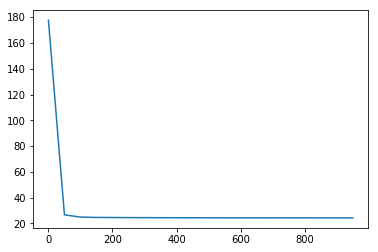

(8, 29)
0   163.545887373707
50   24.1678295694063
100   22.835559515188816
150   22.681997512975336
200   22.624533926732123
250   22.579613672728374
300   22.540726028242347
350   22.50711243103016
400   22.47845309654109
450   22.454356508219718
500   22.434351305208153
550   22.417938546568763
600   22.40463372307974
650   22.393990575031438
700   22.385611261146376
750   22.37914824973742
800   22.374301795768883
850   22.370815390941328
900   22.36847054614895
950   22.367081627866817


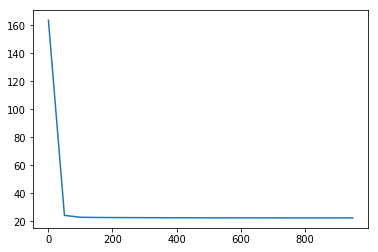

(9, 29)
0   161.62802028003733
50   22.80252551857117
100   21.97496898980448
150   21.886394632284205
200   21.845813320809473
250   21.81718120746932
300   21.79369766003708
350   21.772886299720728
400   21.753853604973145
450   21.73628289451121
500   21.720052501759582
550   21.705097046923218
600   21.69136019019041
650   21.678781135704533
700   21.667292987758156
750   21.656824704020778
800   21.647303648073873
850   21.6386577684524
900   21.630817189292568
950   21.623715258123543


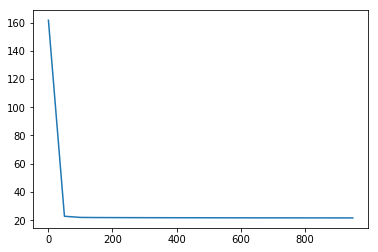

(10, 29)
[[-8.17922661e-01  1.59166401e-01  4.06079844e-01  1.09675595e+00
  -1.01571077e+00  2.05834360e+00 -3.07898585e-02 -2.63166371e+00
   4.61090622e-01 -3.87673996e-01 -1.95521461e+00  1.60174420e-01
  -4.57526384e+00  3.14090169e+00 -3.32858514e+00  1.00370236e-01
   2.43574842e+00  1.96735322e+00  9.40467256e-01 -2.03478309e+00
  -3.27649323e+00  3.34202616e+00  1.49510635e+00  3.83653693e+00
  -2.85831782e+00 -5.94869875e+00  5.80542608e+00 -2.55029654e+00
   2.08106092e+01]
 [-5.19204677e-01  1.48983604e-01 -4.48118007e+00  5.07198996e-01
  -2.49298087e+00  2.68997602e+00 -7.18452981e-02 -2.44669888e+00
   5.27436569e+00 -2.78547256e+00 -1.90906623e+00  7.94426827e-01
  -3.60429555e+00  2.41651105e+00 -2.16417839e+00  5.63962640e-01
  -6.58595299e+00  2.38397473e+00  2.07229769e+00 -4.68028972e+00
  -1.68769871e+00  8.14571277e-01  2.06393179e+00  2.12344975e+00
  -2.04677587e-01  4.64358775e+00  2.37229313e+00 -3.80078818e+00
   1.91274755e+01]
 [-1.09008544e+00  1.88576771

In [8]:
imp_col_indices = [2, 4, 6, 8, 9]
import time
s_t = time.time()
X_train_new = add_more_features(X_train, imp_col_indices)
X_train_scaled = scale_features(X_train_new)

arr_m = gen_linear_regressors(X_train_new, Y_train, 0.75, 10, 0.002, 1000)

print(arr_m)
# m = gd(X_train_new, Y_train, 0.0007, 1000)

# print(m)
e_t = time.time()
print("Duration: ",e_t-s_t, "second")

In [20]:
X_test_new = add_more_features(X_test, imp_col_indices)
X_test_scaled = scale_features(X_test_new)

Y_pred =  predict_from_models(X_test_new, arr_m)
#print(Y_pred)
#Y_pred = predict(X_test_new, m)
np.savetxt("boston_dataset_pred.csv", Y_pred, '%.5f')


0.7564685837065243
     Y_train  Y_train_pred  Y_error  Y_error_perc  Y_error_sq
0       37.9         37.70     0.20          0.53        0.04
1       21.4         21.34     0.06          0.28        0.00
2       12.7         12.35     0.35          2.76        0.12
3       19.9         16.83     3.07         15.43        9.42
4       22.5         22.07     0.43          1.91        0.18
5       32.7         31.62     1.08          3.30        1.17
6       23.2         22.43     0.77          3.32        0.59
7       21.5         20.71     0.79          3.67        0.62
8       20.5         21.23     0.73          3.56        0.53
9       33.3         35.73     2.43          7.30        5.90
10      23.1         24.23     1.13          4.89        1.28
11      20.0         21.01     1.01          5.05        1.02
12      50.0         44.42     5.58         11.16       31.14
13      25.0         26.45     1.45          5.80        2.10
14      20.2         21.45     1.25          6.19  

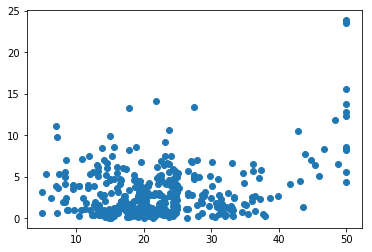

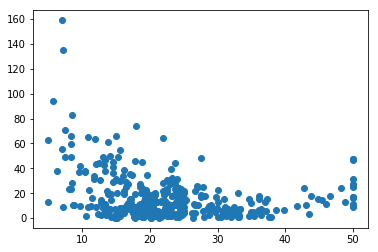

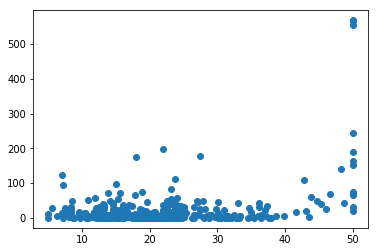

In [ ]:
# Boosting Gradient Descent


In [ ]:
Y_train_pred = predict_from_models(X_train_new, arr_m)
Y_train_pred = np.around(Y_train_pred, 2)

Y_error = np.absolute(Y_train - Y_train_pred)
Y_error = np.around(Y_error, 2)

Y_error_sq = Y_error ** 2
Y_error_sq = np.around(Y_error_sq, 2)

Y_error_perc = (Y_error*100 )/Y_train
Y_error_perc = np.around(Y_error_perc, 2)
dict = {
    "Y_train" : Y_train,
    "Y_train_pred" : Y_train_pred, 
    "Y_error" : Y_error, 
    "Y_error_perc" : Y_error_perc, 
    "Y_error_sq" : Y_error_sq
}
error_data_df = pd.DataFrame(dict)
""" print("i", " ", "Y_train", " ", "Y_train_pred", " ", "Y_error", " ", "Y_error_perc" , " ", "Y_error_sq")

for i in range(len(Y_train)) :
    print(i, "\t", Y_train[i], "\t", Y_train_pred[i], "\t", Y_error[i], "\t", Y_error_perc[i] , "\t", Y_error_sq[i])
    #print(i, " ", Y_train[i], " ", Y_error_sq[i])
"""
print(score(Y_train, Y_train_pred))
print(error_data_df)
print(error_data_df.describe())

import matplotlib.pyplot as plt
plt.scatter(Y_train, Y_error)
plt.show()
plt.scatter(Y_train, Y_error_perc)
plt.show()
plt.scatter(Y_train, Y_error_sq)
plt.show()
